# (28) BOLD full brain, 192, KMeans -- ```KABA```

**Motivation**: Apply KMeans to group-averaged adjacency matrix. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [11]:
# HIDE CODE


def get_group_corrs(mice, mode, desc, band=(0.01, 0.5)):
    kws = {
        f"desc_{mode.split('-')[0]}": desc,
        f"band_{mode.split('-')[0]}": band,
    }
    mice.set_kws(**kws)
    a, _ = collect_adjacencies(
        mice=mice,
        mode=mode,
        fill=1.0,
    )
    z = bn.nanmean(np.arctanh(a), 0)
    r = np.nan_to_num(np.tanh(z))
    return r

## Prep

In [2]:
mice = Mice(192)
bs = Base(mice, mode='ca2')

In [3]:
kws_show = show_kws(7)
kws_show['vmin'] = 0.1
kws_show['vmax'] = 0.6
kws_show['mask_thresh'] = 0.1
kws_show['add_disjoint'] = True

kws_show

{
    'vmin': 0.1,
    'vmax': 0.6,
    'mask_thresh': 0.1,
    'label_fontsize': 16,
    'add_disjoint': True,
    'titles': True
}

In [4]:
default_descs('bold')

['raw', 'rabies', 'rabies-hp', 'rabies-nocr', 'rabies-nowmcsf']

## desc=```rabies-hp```

In [5]:
mice.set_kws(desc_bold='rabies-hp')
gr = Group(
    num_k=7,
    mice=mice,
    mode='bold',
    perc='p20-sample',
).load_group()
_ = gr.avg()

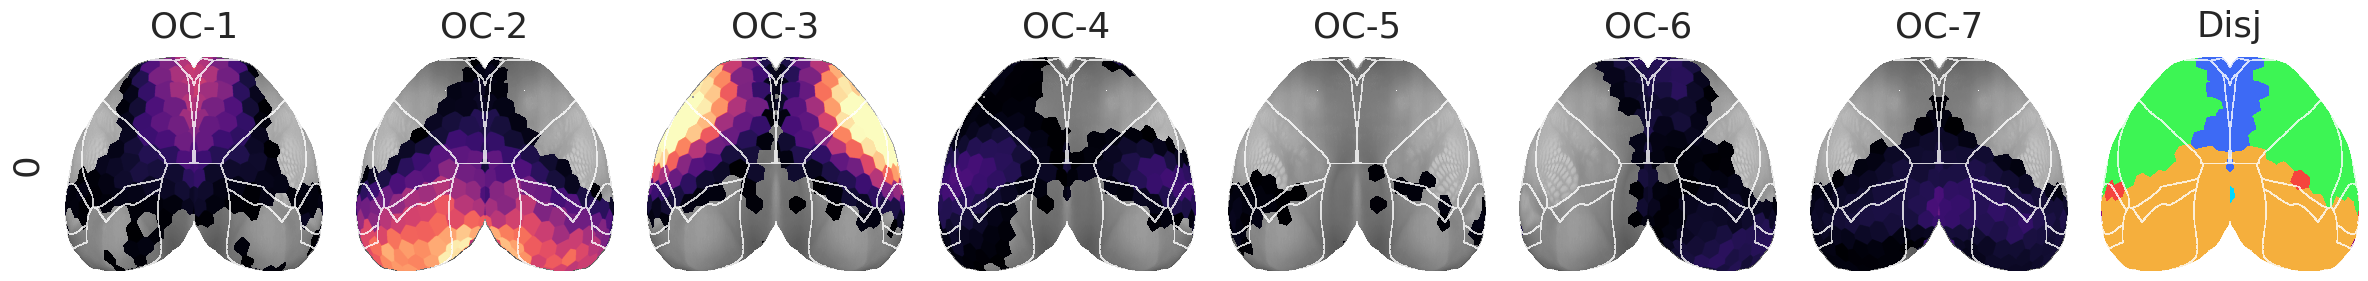

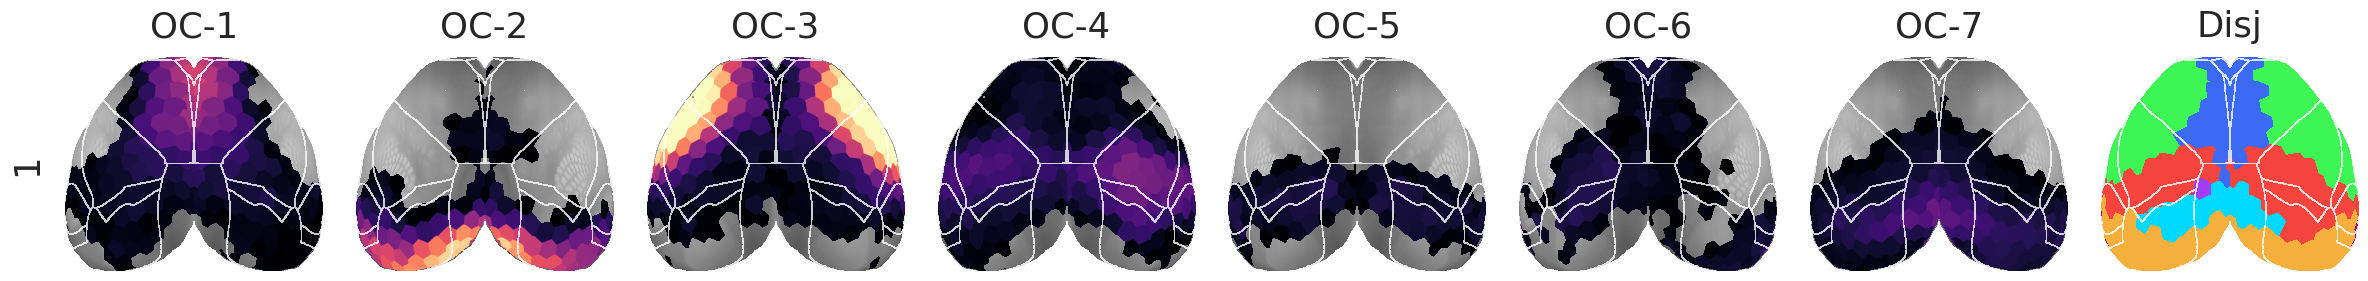

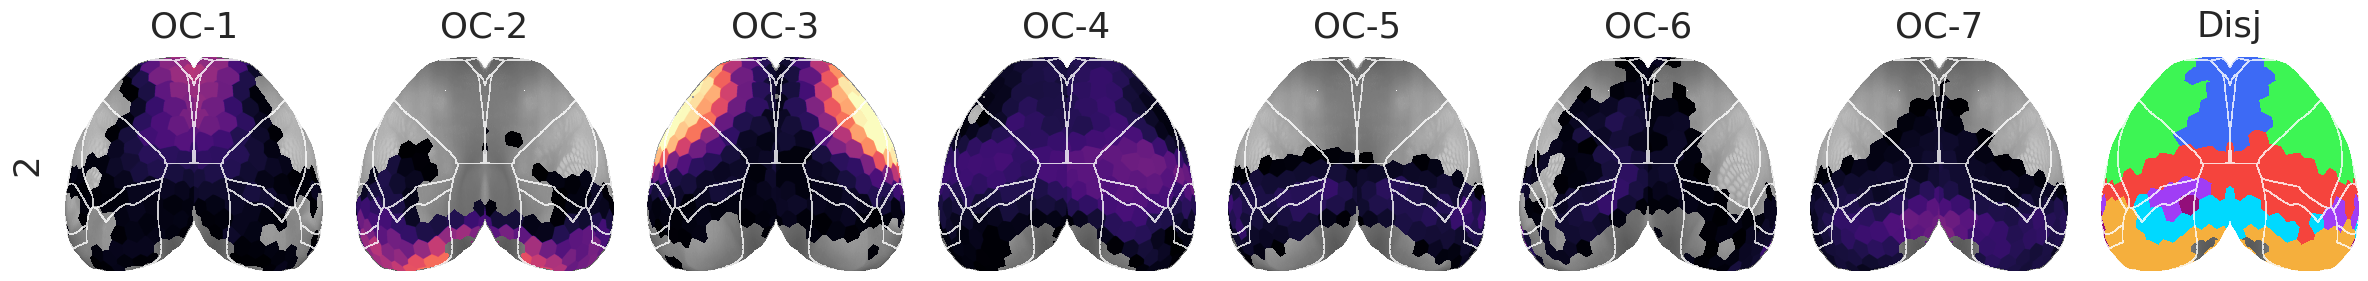

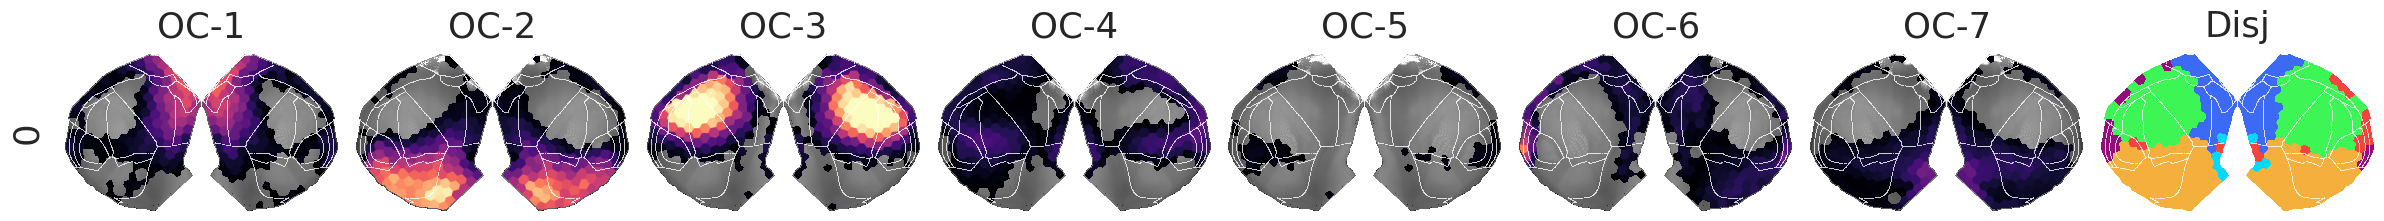

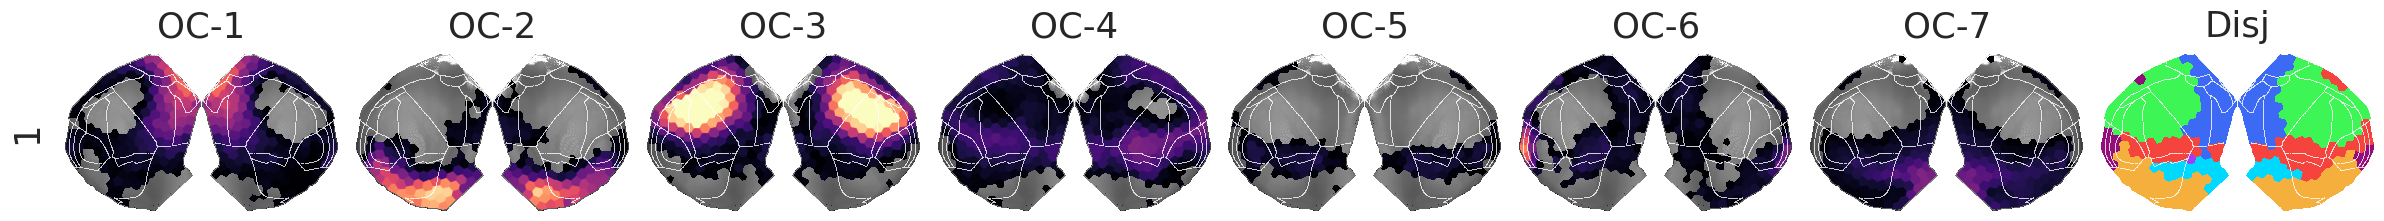

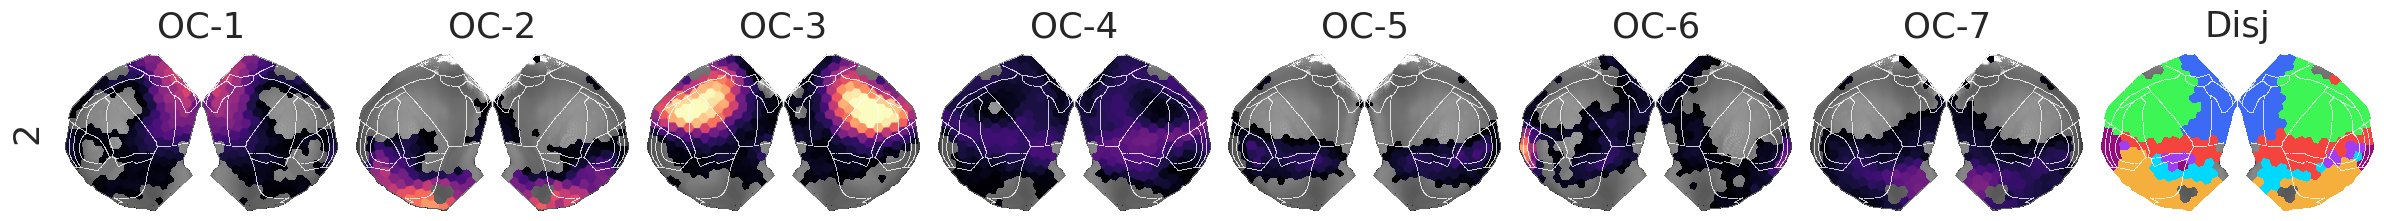

In [6]:
for proj in ['top', 'flat']:
    for layer in [0, 1, 2]:
        gr.show({layer: gr.pi}, layer=layer, proj=proj, **kws_show);

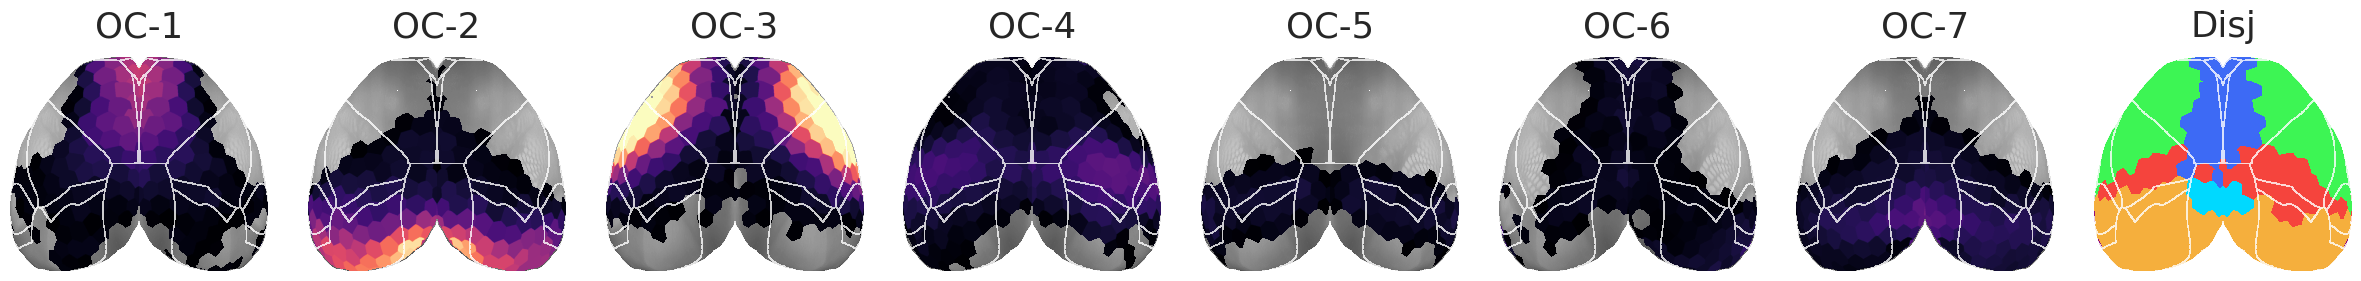

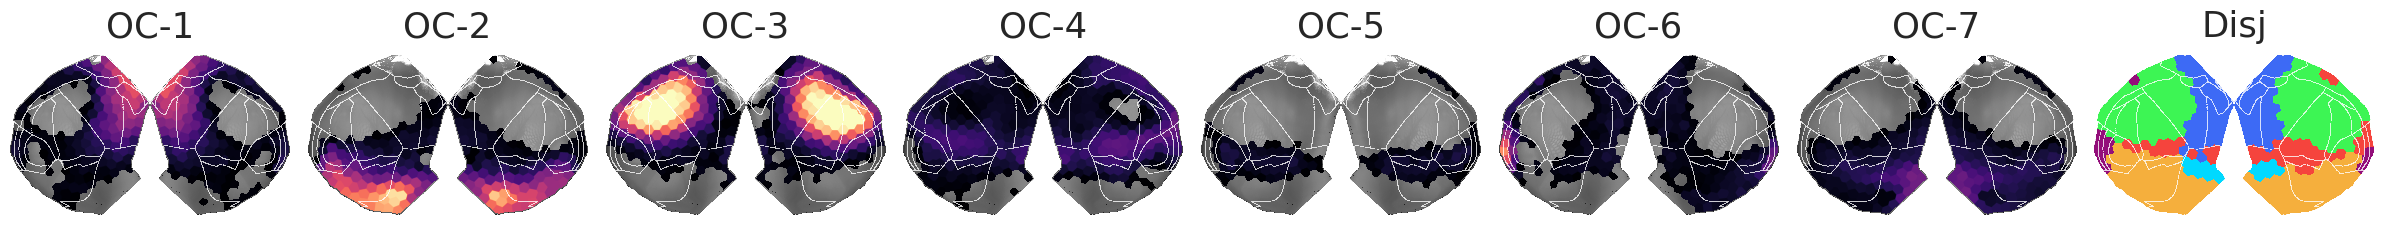

In [7]:
pi_surf = gr.get_surface_pi()
gr.show(pi_surf, proj='top', **kws_show);
gr.show(pi_surf, proj='flat', **kws_show);

## KMeans on corr matrix

In [10]:
r = get_group_corrs(mice, 'bold', 'rabies-hp')

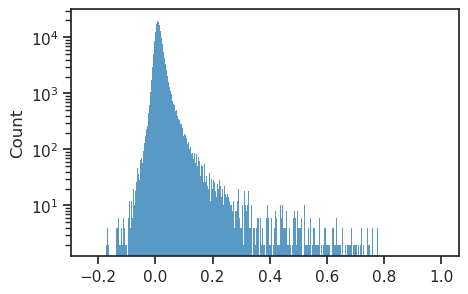

In [31]:
sns.histplot(r.ravel())
plt.yscale('log')

In [45]:
num_k = 10
affinity = (1 + r) / 2
centroids, km = fit_kmeans(
    affinity,
    num_k,
    'euclidean',
    kw_kmeans={'n_init': 10, 'max_iter': 300})
pi = centroids / centroids.sum(0, keepdims=True)

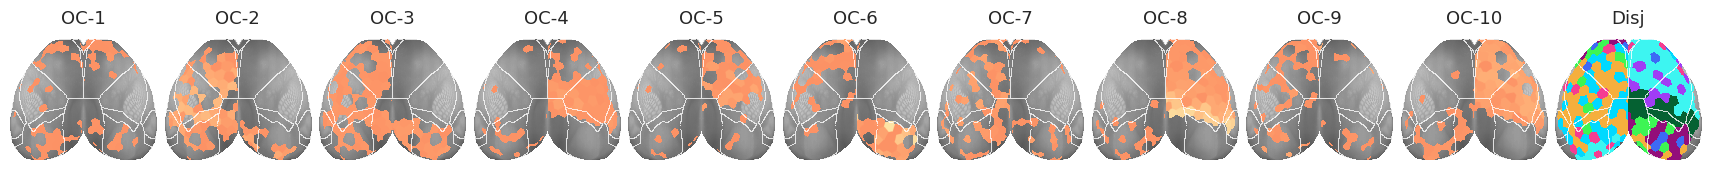

In [46]:
bs.show(
    pi,
    vmin=0.,
    vmax=pi.max(),
    mask_thresh=0.1,
    figsize=(17, 3),
    add_disjoint=True,
    titles=True,
    layout='constrained',
);

<matplotlib.image.AxesImage object at 0x7fdb8c2df4f0>

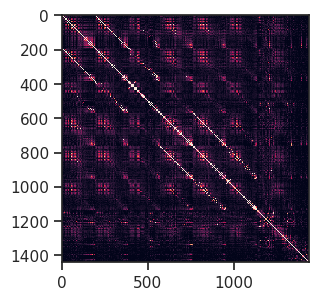

In [49]:
plt.imshow(r, vmin=0, vmax=0.2)

In [52]:
192 * 3

576

In [50]:
df = mice.parcel.df
df = df.loc[df['acro'] == 'Isocortex']

In [51]:
df

,id,acro,hemis,region,layer
0,1,Isocortex,1,1,0
1,2,Isocortex,1,2,0
2,3,Isocortex,1,3,0
3,4,Isocortex,1,4,0
4,5,Isocortex,1,5,0
...,...,...,...,...,...
1147,1148,Isocortex,2,188,2
1148,1149,Isocortex,2,189,2
1149,1150,Isocortex,2,190,2
1150,1151,Isocortex,2,191,2
